In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
def create_cnn_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1)))

    model.add(Flatten())
    model.add(Dense(64, activation='relu')) 
    model.add(Dense(10, activation='softmax'))

    return model

In [8]:
cnn_model = create_cnn_model()
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │     1,638,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,657,930 (6.32 MB)

 Trainable params: 1,657,930 (6.32 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [10]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [11]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [12]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
)

datagen.fit(x_train)

In [28]:
history_original = cnn_model.fit(x_train, y_train,  epochs=10, batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 38ms/step - accuracy: 0.9965 - loss: 0.0137
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 39ms/step - accuracy: 0.9982 - loss: 0.0061
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 40ms/step - accuracy: 0.9969 - loss: 0.0089
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.9984 - loss: 0.0053
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.9982 - loss: 0.0059
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 38ms/step - accuracy: 0.9980 - loss: 0.0064
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.9989 - loss: 0.0039
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 38ms/step - accuracy: 0.9983 - loss: 0.0049
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 38ms/step - accuracy: 0.9988 - loss: 0.0047
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.9984 - loss: 0.0055


In [19]:
cnn_model_augmented = create_cnn_model()
cnn_model_augmented.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_augmented = cnn_model_augmented.fit(datagen.flow(x_train, y_train, batch_size=32),
                                            validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 45ms/step - accuracy: 0.8393 - loss: 0.4947 - val_accuracy: 0.9823 - val_loss: 0.0539
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.9683 - loss: 0.1009 - val_accuracy: 0.9879 - val_loss: 0.0401
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.9737 - loss: 0.0813 - val_accuracy: 0.9904 - val_loss: 0.0324
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.9800 - loss: 0.0655 - val_accuracy: 0.9880 - val_loss: 0.0430
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 41ms/step - accuracy: 0.9819 - loss: 0.0582 - val_accuracy: 0.9885 - val_loss: 0.0350
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 103s 55ms/step - accuracy: 0.9826 - loss: 0.0555 - val_accuracy: 0.9916 - val_loss: 0.0301
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 98s 52ms/step - accuracy: 0.9849 - loss: 0.0505 - val_accuracy: 0.9893 - val_loss: 0.0327
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.9859 

In [29]:
test_loss_orig, test_acc_orig = cnn_model.evaluate(x_test, y_test)
print(f"Test accuracy  original data: {test_acc_orig:.4f}")
test_loss_aug, test_acc_aug = cnn_model_augmented.evaluate(x_test, y_test)
print(f"Test accuracy augmented data: {test_acc_aug:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9878 - loss: 0.0711
Test accuracy  original data: 0.9899
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9892 - loss: 0.0387
Test accuracy augmented data: 0.9902


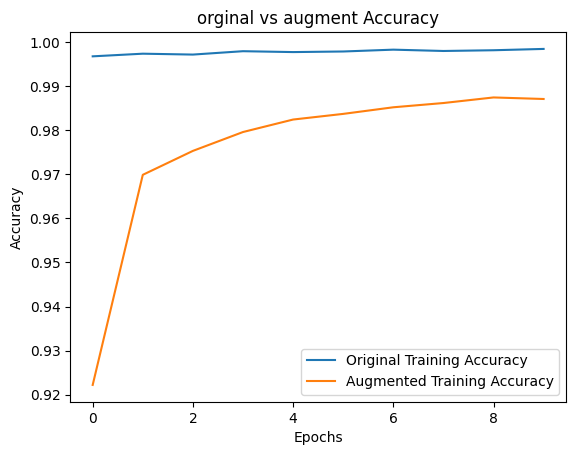

In [30]:

plt.plot(history_original.history['accuracy'], label='Original Training Accuracy')
plt.plot(history_augmented.history['accuracy'], label='Augmented Training Accuracy')
plt.title('orginal vs augment Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [32]:
plt.plot(history_original.history['val_accuracy'], label='Original  Accuracy')
plt.plot(history_augmented.history['val_accuracy'], label='Augmented  Accuracy')
plt.title('orginal vs augment accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

KeyError: 'val_accuracy'